In [ ]:
# 1번
# (x−1, 2y+x) r = 0.5
# x = 1 , y = 2

def f_x(x):
  return x-1

def f_y(x, y):
  return 2*y + x

def gradient_discent(x, y, r):
  new_x = x - r*f_x(x)
  new_y = y - r*f_y(x,y)
  return new_x, new_y
x = 1
y = 2
for i in range(10):
  print(gradient_discent(x, y, 0.5))
  x, y = gradient_discent(x, y, 0.5)
  


(1.0, -0.5)
(1.0, -0.5)
(1.0, -0.5)
(1.0, -0.5)
(1.0, -0.5)
(1.0, -0.5)
(1.0, -0.5)
(1.0, -0.5)
(1.0, -0.5)
(1.0, -0.5)


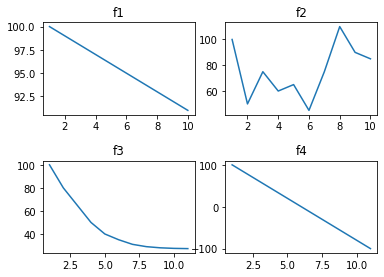

In [ ]:
# 2번
import matplotlib.pyplot as plt

step1 = [i for i in range(1, 11)]
step2 = [i for i in range(1, 12)]

f1 = [100, 99, 98, 97, 96, 95, 94, 93, 92, 91]
f2 = [100, 50, 75, 60, 65, 45, 75, 110, 90, 85]
f3 = [100, 80, 65, 50, 40, 35, 31, 29, 28, 27.5, 27.3]
f4 = [100, 80, 60, 40, 20, 0, -20, -40, -60, -80, -100]

fig = plt.figure()
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

ax1.plot(step1, f1)
ax1.set_title("f1")

ax2.plot(step1, f2)
ax2.set_title("f2")

ax3.plot(step2, f3)
ax3.set_title("f3")

ax4.plot(step2, f4)
ax4.set_title("f4")

plt.subplots_adjust(left=0.125, bottom=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.5)

plt.show()

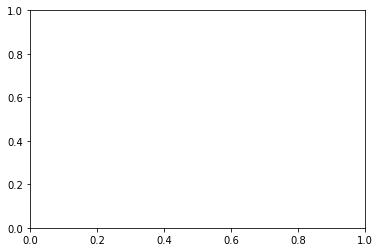

In [ ]:
# 3번 
import matplotlib as mpl
mpl.use('PDF')
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

def func(x,y):
  return (x - 5.0)**2 + (y + 2.0)**2 - 2.0*x*y

def func_grad(vx,vy):
  dfdx = 2.0*vx - 10.0 - 2.0*vy
  dfdy = 2.0*vy + 4.0 - 2*vx
  return np.array([dfdx,dfdy])

#prepare for contour plot
xlist = np.linspace(0, 5, 26)
ylist = np.linspace(0, 5, 26)
x, y = np.meshgrid(xlist, ylist)
z = func(x,y)
lev = np.linspace(0,20,21)

#iterate location
v_init = np.array([0,2])
num_iter = 10
values = np.zeros([num_iter,2])
for gamma in [0.001, 0.01, 0.1, 0.2, 0.5, 1]:
  values[0,:] = v_init
  v = v_init

  # actual gradient descent algorithm
  for i in range(1,num_iter):
    v = v - gamma * func_grad(v[0],v[1])
    values[i,:] = v

  #plotting
  plt.contour(x,y,z,levels=lev)
  plt.plot(values[:,0],values[:,1],'r-')
  plt.plot(values[:,0],values[:,1],'bo')
  grad_norm = LA.norm(func_grad(v[0],v[1]))
  title = "gamma %0.2f | final grad %0.3f" % (gamma,grad_norm)
  plt.title(title)
  file = "f1, gd-%0.2f.pdf"%(gamma)
  plt.savefig(file, bbox_inches='tight')
  plt.clf()
  plt.cla()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in double_scalars
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in subtract
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: overflow encountered in double_scalars
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: invalid value encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: RuntimeWarning: invalid value encountered in double_scalars
  del sys.path[0]
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: overflow encountered in double_scalars
  if sys.path[0] == '':
/usr/local/lib/python3.7/

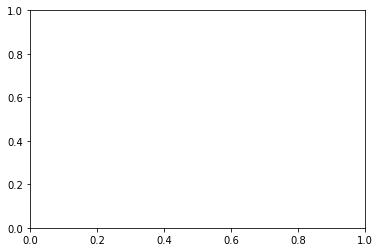

In [ ]:
# 3번 
import matplotlib as mpl
mpl.use('PDF')
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

def func(x,y):
  return (1.0 - (y - 4.0))**2 + 20*((x + 6.0) - (y - 4.0)**2)**2

def func_grad(vx,vy):
  dfdx = 40*(vx - (vy - 4.0)**2 + 6)
  dfdy = -80 * (-(vy-4.0)**2 + vx + 6)*(vy-4) -2*(5-vy)
  return np.array([dfdx,dfdy])

#prepare for contour plot
xlist = np.linspace(0, 5, 26)
ylist = np.linspace(0, 5, 26)
x, y = np.meshgrid(xlist, ylist)
z = func(x,y)
lev = np.linspace(0,20,21)

#iterate location
v_init = np.array([2,0])
num_iter = 100
values = np.zeros([num_iter,2])
for gamma in [0.001, 0.01, 0.1, 0.2, 0.5, 1]:
  values[0,:] = v_init
  v = v_init

  # actual gradient descent algorithm
  for i in range(1,num_iter):
    v = v - gamma * func_grad(v[0],v[1])
    values[i,:] = v

  #plotting
  plt.contour(x,y,z,levels=lev)
  plt.plot(values[:,0],values[:,1],'r-')
  plt.plot(values[:,0],values[:,1],'bo')
  grad_norm = LA.norm(func_grad(v[0],v[1]))
  title = "gamma %0.2f | final grad %0.3f" % (gamma,grad_norm)
  plt.title(title)
  file = "f2, gd-%0.2f.pdf" % (gamma)
  plt.savefig(file, bbox_inches='tight')
  plt.clf()
  plt.cla()
